In [1]:
from fastai.vision.all import *
from utils import *

from fastai.imports import *
from fastai.vision.widgets import *
# to easier work with paths
from pathlib import Path
matplotlib.rc('image', cmap='Greys')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [3]:
TRAIN = Path("../../storage/train")
TEST = Path("../../storage/test")

In [4]:
fns = get_image_files(TRAIN)

In [5]:
fns

(#33600) [Path('../../storage/train/6/2936.jpg'),Path('../../storage/train/6/39450.jpg'),Path('../../storage/train/6/30603.jpg'),Path('../../storage/train/6/3463.jpg'),Path('../../storage/train/6/2269.jpg'),Path('../../storage/train/6/13372.jpg'),Path('../../storage/train/6/25279.jpg'),Path('../../storage/train/6/25608.jpg'),Path('../../storage/train/6/31853.jpg'),Path('../../storage/train/6/4593.jpg')...]

In [6]:
im = Image.open('../../storage/train/0/63.jpg')
im

In [12]:
numbers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = numbers.dataloaders(TRAIN)

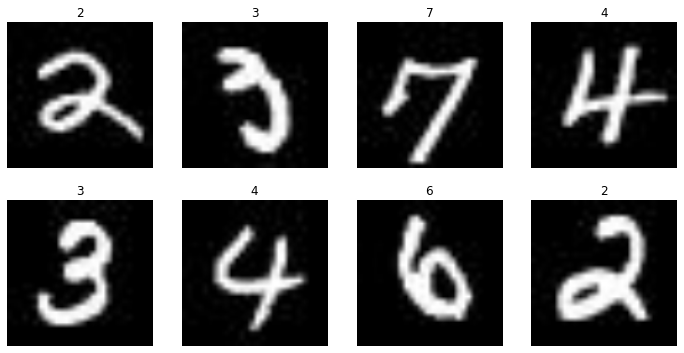

In [9]:
dls.valid.show_batch(max_n=8, nrows=2)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

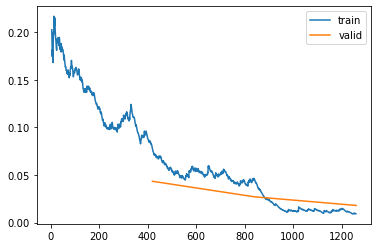

In [16]:
learn.recorder.plot_loss()


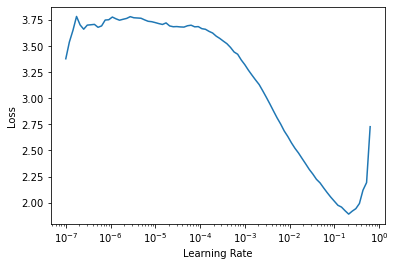

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [20]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.09e-02, steepest point: 3.63e-03


In [21]:
learn.fit_one_cycle(3, lr_steep)

In [22]:
learn.unfreeze()

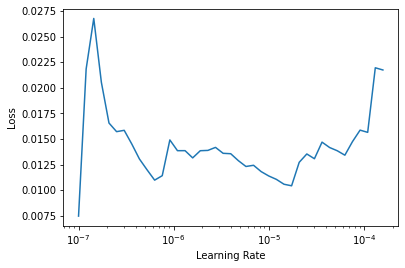

In [24]:
lr_min,lr_steep = learn.lr_find()

In [25]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-06, steepest point: 9.12e-07


In [26]:
learn.fit_one_cycle(12, lr_max=slice(2e-07,9e-07))

In [27]:
learn.fit_one_cycle(12, 2e-08)

In [28]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)
learn2.fine_tune(5,3e-03 )

In [29]:
# the best
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)
learn2.fine_tune(8,3e-03 )

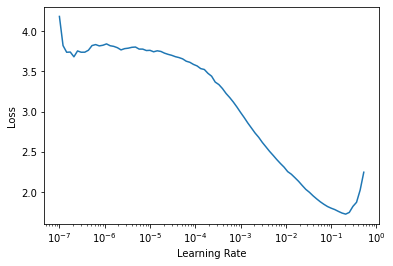

In [32]:
learn3 = cnn_learner(dls, resnet50, metrics=error_rate)
lr_min,lr_steep = learn3.lr_find()

In [33]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.09e-02, steepest point: 2.29e-04


In [34]:
learn3.fine_tune(8,lr_steep )

In [35]:
learn3.fine_tune(8,lr_steep )

In [36]:
learn4 = cnn_learner(dls, resnet50, metrics=error_rate)
learn4.fit_one_cycle(5, lr_steep)


In [39]:
learn4.unfreeze()


In [41]:
learn4.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [57]:
im = Image.open('../../storage/test/0.jpg')
im


In [60]:
 learn2.predict('../../storage/test/0.jpg')

('2',
 tensor(2),
 tensor([2.2622e-09, 1.5657e-09, 1.0000e+00, 6.3985e-09, 1.3447e-10, 2.4730e-10,
         3.4891e-08, 1.2669e-08, 1.6907e-09, 1.2342e-09]))

In [68]:
TEST.ls()

(#28000) [Path('../../storage/test/2936.jpg'),Path('../../storage/test/2959.jpg'),Path('../../storage/test/25343.jpg'),Path('../../storage/test/2874.jpg'),Path('../../storage/test/4825.jpg'),Path('../../storage/test/25579.jpg'),Path('../../storage/test/17367.jpg'),Path('../../storage/test/10775.jpg'),Path('../../storage/test/16619.jpg'),Path('../../storage/test/1400.jpg')...]

In [69]:
# preds = []
# for test_path in TEST.ls():
#     p = learn.predict(test_path)
#     preds.append(p)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [70]:
# We have a test_dl where you pass in the items you want to use as your test set.

# For instance here you would do:

# test_dl = dls.test_dl(get_image_files('mnist_data/train'))
# (where dls is your original dataloader)

# and you can then just do learn.get_preds(dl=test_dl)

In [71]:
test_dl = dls.test_dl(get_image_files(TEST))

In [73]:
class_score, y = learn2.get_preds(dl=test_dl)

In [74]:
class_score = np.argmax(class_score, axis=1)

In [75]:
class_score

tensor([4, 6, 3,  ..., 4, 9, 1])

In [86]:
submission  = pd.DataFrame({"ImageId": ImageId,"Label": class_score})

In [87]:
submission

ImageId  Label
0         2937      4
1         2960      6
2        25344      3
3         2875      9
4         4826      1
...        ...    ...
27995     3872      1
27996     4963      8
27997    21838      4
27998    27891      9
27999     4295      1

[28000 rows x 2 columns]

In [88]:
submission.to_csv("submission_nathanRodrigue.csv", index=False)

In [ ]:
submission??